#### Term Project: Milestone 4, Data transformation or cleansing steps to API source data
##### Name: Prashant Raghuwanshi
##### Date: 11/06/2021
##### Course: DSC540-T301 Data Preparation (2221-1)

In [1]:
# Import common Data preparation libraries:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### API Data Source: 

In [2]:
# import libraries for Api Data Source
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

###### Fetching all crypto currency latest price data from coinmarket api

In [3]:
# Calling api request and storing the responce in dict
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'100',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'c6d563eb-5020-4805-822e-422c3a9b018c',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
# storing jason to Dict
  data = json.loads(response.text)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

##### Parsing  nested Api Json data into  Dataframe

In [4]:
# crearted the list -step 1
cryptodata = data['data']
# display the first element, with all columns in dataset
cryptodata[0]

{'id': 1,
 'name': 'Bitcoin',
 'symbol': 'BTC',
 'slug': 'bitcoin',
 'num_market_pairs': 8294,
 'date_added': '2013-04-28T00:00:00.000Z',
 'tags': ['mineable',
  'pow',
  'sha-256',
  'store-of-value',
  'state-channels',
  'coinbase-ventures-portfolio',
  'three-arrows-capital-portfolio',
  'polychain-capital-portfolio',
  'binance-labs-portfolio',
  'arrington-xrp-capital',
  'blockchain-capital-portfolio',
  'boostvc-portfolio',
  'cms-holdings-portfolio',
  'dcg-portfolio',
  'dragonfly-capital-portfolio',
  'electric-capital-portfolio',
  'fabric-ventures-portfolio',
  'framework-ventures',
  'galaxy-digital-portfolio',
  'huobi-capital',
  'alameda-research-portfolio',
  'a16z-portfolio',
  '1confirmation-portfolio',
  'winklevoss-capital',
  'usv-portfolio',
  'placeholder-ventures-portfolio',
  'pantera-capital-portfolio',
  'multicoin-capital-portfolio',
  'paradigm-xzy-screener'],
 'max_supply': 21000000,
 'circulating_supply': 18865700,
 'total_supply': 18865700,
 'platform'

In [5]:
# Format data into a more readable format-- parsing the api data and writting it to list
# parsing the nested Jason data present in quote collumns and creating datafrane for data preparation requirment
rows=[]
for currency in cryptodata:
    currency_id = currency['id']
    slug = currency['slug']
    cmc_rank = currency['cmc_rank']
    total_supply = currency['total_supply']
    currency_name = currency['name']
    currency_symbol = currency['symbol']
    currenct_price = currency['quote']['USD']['price']
    last_updated = currency['quote']['USD']['last_updated']
    rows.append([currency_id, slug, currency_name , currency_symbol, cmc_rank, currenct_price, total_supply,last_updated])

In [6]:
# Created new Dataframe which contains required price quote columns
# Replace Headers
df_parse_nested_json = pd.DataFrame(rows, columns=["currency_id", "slug", "currency_name", "currency_symbol", "cmc_rank", "currency_price", "total_supply", "last_updated"])

In [7]:
# Display the new df data, use full for creating the lookup file..which contains the currency name and its corresponding short name
df_parse_nested_lookup = pd.DataFrame(df_parse_nested_json, columns = ['slug', 'currency_symbol'])
# writting the df to csv file for archiving the fetch data for future refrences
df_parse_nested_lookup.to_csv(r'C:/Users/dell/Documents/docker/coin_lookup.csv')

In [8]:
# display parsed and reshaped dataframe
df_parse_nested_lookup. head()

,slug,currency_symbol
0,bitcoin,BTC
1,ethereum,ETH
2,binance-coin,BNB
3,solana,SOL
4,tether,USDT


In [9]:
#Fix Header casing, updating columns name in uppercase
df_crypto_price = df_parse_nested_json.rename(columns=str.upper)
df_crypto_price.head()

,CURRENCY_ID,SLUG,CURRENCY_NAME,CURRENCY_SYMBOL,CMC_RANK,CURRENCY_PRICE,TOTAL_SUPPLY,LAST_UPDATED
0,1,bitcoin,Bitcoin,BTC,1,60880.163530,1.886570e+07,2021-11-06T18:25:02.000Z
1,1027,ethereum,Ethereum,ETH,2,4441.364800,1.182345e+08,2021-11-06T18:25:02.000Z
2,1839,binance-coin,Binance Coin,BNB,3,618.904122,1.668011e+08,2021-11-06T18:24:12.000Z
3,5426,solana,Solana,SOL,4,252.331559,5.083843e+08,2021-11-06T18:25:05.000Z
4,825,tether,Tether,USDT,5,1.000889,7.335785e+10,2021-11-06T18:24:20.000Z


In [10]:
# transforming total supply value in millions
# create function, convert counts in million
def convert_to_million(total):
    total1 = total/1000000
    return total1

In [11]:
# call created function and update the date column value by using lambda function
df_crypto_price['TOTAL_SUPPLY'] = df_crypto_price['TOTAL_SUPPLY'].apply(lambda x: convert_to_million(x))

In [12]:
df_crypto_price.head()

,CURRENCY_ID,SLUG,CURRENCY_NAME,CURRENCY_SYMBOL,CMC_RANK,CURRENCY_PRICE,TOTAL_SUPPLY,LAST_UPDATED
0,1,bitcoin,Bitcoin,BTC,1,60880.163530,18.865700,2021-11-06T18:25:02.000Z
1,1027,ethereum,Ethereum,ETH,2,4441.364800,118.234458,2021-11-06T18:25:02.000Z
2,1839,binance-coin,Binance Coin,BNB,3,618.904122,166.801148,2021-11-06T18:24:12.000Z
3,5426,solana,Solana,SOL,4,252.331559,508.384251,2021-11-06T18:25:05.000Z
4,825,tether,Tether,USDT,5,1.000889,73357.845272,2021-11-06T18:24:20.000Z


In [13]:
# drop dublicate currency price entries from dataframe
df_crypto_price_drop_dup = df_crypto_price.drop_duplicates(subset=['CURRENCY_ID', 'CURRENCY_SYMBOL'], keep='first')

In [14]:
df_crypto_price_drop_dup.shape

(100, 8)

In [15]:
#created function to convert timestame to date
def tstodate(ts):
    a2 = pd.to_datetime(ts)
    a3 = a2.strftime('%Y%m%d')
    return a3

In [16]:
# call created function and update the date column value by using lambda function
df_crypto_price_drop_dup['LAST_UPDATED'] = df_crypto_price_drop_dup['LAST_UPDATED'].apply(lambda x: tstodate(x))

In [17]:
df_crypto_price_drop_dup.head()

,CURRENCY_ID,SLUG,CURRENCY_NAME,CURRENCY_SYMBOL,CMC_RANK,CURRENCY_PRICE,TOTAL_SUPPLY,LAST_UPDATED
0,1,bitcoin,Bitcoin,BTC,1,60880.163530,18.865700,20211106
1,1027,ethereum,Ethereum,ETH,2,4441.364800,118.234458,20211106
2,1839,binance-coin,Binance Coin,BNB,3,618.904122,166.801148,20211106
3,5426,solana,Solana,SOL,4,252.331559,508.384251,20211106
4,825,tether,Tether,USDT,5,1.000889,73357.845272,20211106


#### Web Data Source

###### Import libraries for Web Scraping

In [18]:
# import library to open urls and download htmls
# print out python data structures
from pprint import pprint
# for parsing all the tables present
# on the website
import urllib.request
from html_table_parser.parser import HTMLTableParser
# for converting the parsed data to pandas dataframe
from bs4 import BeautifulSoup

In [19]:
# define function to pull the website html file
def url_load_html(url):
    # request to the website
    req = urllib.request.Request(url=url)
    f = urllib.request.urlopen(req)
    # reading contents of the website
    return f.read()

In [20]:
# define the html contents of a URL.
xhtml = url_load_html('https://www.moneycontrol.com/stocks/marketstats/fii_dii_activity/index.php').decode('utf-8')
# Defining the HTMLTableParser object
par = HTMLTableParser()
# feeding the html contents in the
# HTMLTableParser object
par.feed(xhtml)

In [21]:
# Format data into a more readable format

#This step pulls the required table data from html file
#pprint(par.tables[4])
# converting the parsed web table data to dataframe
df_html_data = pd.DataFrame(par.tables[4])
# display the fetch table data in dataframe
df_html_data.head()

,0,1,2,3,4,5,6
0,,FII Rs Crores,DII Rs Crores,None,None,None,None
1,Date,Gross Purchase,Gross Sales,Net Purchase / Sales,Gross Purchase,Gross Sales,Net Purchase / Sales
2,October 2021 October 2021,"185,566.83","211,139.02","-25,572.19","151,607.74","147,136.75","4,470.99"
3,September 2021 September 2021,"217,636.41","216,722.64",913.77,"144,147.33","138,198.48","5,948.85"
4,August 2021 August 2021,"175,168.36","177,736.88","-2,568.52","131,185.18","124,290.49","6,894.69"


In [22]:
# setting second row as header
# step-1 extracting the header information
new_header = df_html_data.iloc[1] #grab the first row for the header

In [23]:
new_header[1] = 'Tot_Gross_Purchase'
new_header[2] = 'Gross_Sales'
new_header[3] = 'net_purchase'
new_header

0                    Date
1      Tot_Gross_Purchase
2             Gross_Sales
3            net_purchase
4          Gross Purchase
5             Gross Sales
6    Net Purchase / Sales
Name: 1, dtype: object

In [24]:
df_html_data1 = df_html_data[2:] #take out the data less the header row

In [25]:
df_html_data1.head()

,0,1,2,3,4,5,6
2,October 2021 October 2021,"185,566.83","211,139.02","-25,572.19","151,607.74","147,136.75","4,470.99"
3,September 2021 September 2021,"217,636.41","216,722.64",913.77,"144,147.33","138,198.48","5,948.85"
4,August 2021 August 2021,"175,168.36","177,736.88","-2,568.52","131,185.18","124,290.49","6,894.69"
5,July 2021 July 2021,"125,896.68","149,090.07","-23,193.39","117,910.10","99,516.18","18,393.92"
6,June 2021 June 2021,"170,188.95","170,214.84",-25.89,"114,289.67","107,246.16","7,043.51"


In [26]:
df_html_data1.columns = new_header #set the header row as the df header
df_html_data1.head()

1,Date,Tot_Gross_Purchase,Gross_Sales,net_purchase,Gross Purchase,Gross Sales,Net Purchase / Sales
2,October 2021 October 2021,"185,566.83","211,139.02","-25,572.19","151,607.74","147,136.75","4,470.99"
3,September 2021 September 2021,"217,636.41","216,722.64",913.77,"144,147.33","138,198.48","5,948.85"
4,August 2021 August 2021,"175,168.36","177,736.88","-2,568.52","131,185.18","124,290.49","6,894.69"
5,July 2021 July 2021,"125,896.68","149,090.07","-23,193.39","117,910.10","99,516.18","18,393.92"
6,June 2021 June 2021,"170,188.95","170,214.84",-25.89,"114,289.67","107,246.16","7,043.51"


In [27]:
# renaming the columns names
df_html_data2 = df_html_data1.rename(columns={"Gross Purchase":"Int_Gross_Purchase", "Gross Sales":"Int_Gross_Sales", "Net Purchase / Sales":"int_Net_Purchase"})
df_html_data2.head()

1,Date,Tot_Gross_Purchase,Gross_Sales,net_purchase,Int_Gross_Purchase,Int_Gross_Sales,int_Net_Purchase
2,October 2021 October 2021,"185,566.83","211,139.02","-25,572.19","151,607.74","147,136.75","4,470.99"
3,September 2021 September 2021,"217,636.41","216,722.64",913.77,"144,147.33","138,198.48","5,948.85"
4,August 2021 August 2021,"175,168.36","177,736.88","-2,568.52","131,185.18","124,290.49","6,894.69"
5,July 2021 July 2021,"125,896.68","149,090.07","-23,193.39","117,910.10","99,516.18","18,393.92"
6,June 2021 June 2021,"170,188.95","170,214.84",-25.89,"114,289.67","107,246.16","7,043.51"


In [28]:
#Fix Header casing
# updating columns name in uppercase
df_html_data3 = df_html_data2.rename(columns=str.upper)
df_html_data3.head()

1,DATE,TOT_GROSS_PURCHASE,GROSS_SALES,NET_PURCHASE,INT_GROSS_PURCHASE,INT_GROSS_SALES,INT_NET_PURCHASE
2,October 2021 October 2021,"185,566.83","211,139.02","-25,572.19","151,607.74","147,136.75","4,470.99"
3,September 2021 September 2021,"217,636.41","216,722.64",913.77,"144,147.33","138,198.48","5,948.85"
4,August 2021 August 2021,"175,168.36","177,736.88","-2,568.52","131,185.18","124,290.49","6,894.69"
5,July 2021 July 2021,"125,896.68","149,090.07","-23,193.39","117,910.10","99,516.18","18,393.92"
6,June 2021 June 2021,"170,188.95","170,214.84",-25.89,"114,289.67","107,246.16","7,043.51"


In [29]:
# create lambda function to fix the date inconsistent values
# input -- September 2021 September 2021 --> out put : 2021-09-01
import re
def remove_dup_date(row):
        k = re.split("   ", row)
        k1 = re.split(" ", k[1])
        a = pd.to_datetime(k1[1] + k1[0], format='%Y%B')
        #print(a)
        return a

In [30]:
# fixing inconsistent values for date columns -- date values are populting twice 
# step 1 create function and update the date column value by using lambda function
df_html_data3['DATE'] = df_html_data3['DATE'].apply(lambda x: remove_dup_date(x))

In [31]:
# create lambda function to fix the amount inconsistent values
# input -- '175,168.36' --> out put : 175168.36
import re
def fix_amount_value(row):
        b = row.replace(',', '')
        b2 = float(b)
        #print(b2)
        return b

In [32]:
# displaying df after fixing date value
df_html_data3.head()

1,DATE,TOT_GROSS_PURCHASE,GROSS_SALES,NET_PURCHASE,INT_GROSS_PURCHASE,INT_GROSS_SALES,INT_NET_PURCHASE
2,2021-10-01,"185,566.83","211,139.02","-25,572.19","151,607.74","147,136.75","4,470.99"
3,2021-09-01,"217,636.41","216,722.64",913.77,"144,147.33","138,198.48","5,948.85"
4,2021-08-01,"175,168.36","177,736.88","-2,568.52","131,185.18","124,290.49","6,894.69"
5,2021-07-01,"125,896.68","149,090.07","-23,193.39","117,910.10","99,516.18","18,393.92"
6,2021-06-01,"170,188.95","170,214.84",-25.89,"114,289.67","107,246.16","7,043.51"


In [33]:
df_html_data3['TOT_GROSS_PURCHASE'] = df_html_data3['TOT_GROSS_PURCHASE'].apply(lambda x: fix_amount_value(x))

In [34]:
# Remove duplicates based on second and third columns value
df_html_data3_rm_dup = df_html_data3.drop_duplicates(['TOT_GROSS_PURCHASE', 'GROSS_SALES'], keep='last')
df_html_data3_rm_dup.head()

1,DATE,TOT_GROSS_PURCHASE,GROSS_SALES,NET_PURCHASE,INT_GROSS_PURCHASE,INT_GROSS_SALES,INT_NET_PURCHASE
2,2021-10-01,185566.83,"211,139.02","-25,572.19","151,607.74","147,136.75","4,470.99"
3,2021-09-01,217636.41,"216,722.64",913.77,"144,147.33","138,198.48","5,948.85"
4,2021-08-01,175168.36,"177,736.88","-2,568.52","131,185.18","124,290.49","6,894.69"
5,2021-07-01,125896.68,"149,090.07","-23,193.39","117,910.10","99,516.18","18,393.92"
6,2021-06-01,170188.95,"170,214.84",-25.89,"114,289.67","107,246.16","7,043.51"


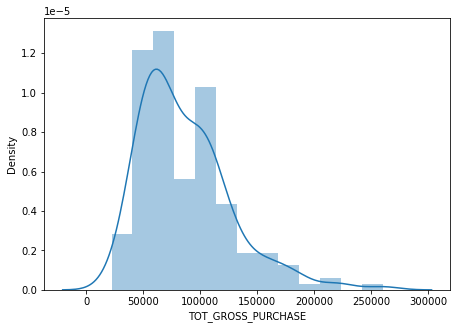

In [35]:
#Identify outliers and bad data
#plot boxplot to find outliers data
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df_html_data3_rm_dup['TOT_GROSS_PURCHASE'])
plt.show()

In [36]:
#  Finding the Outliers
df_html_data3_rm_dup[(df_html_data3_rm_dup['TOT_GROSS_PURCHASE'] > '250000') | (df_html_data3_rm_dup['TOT_GROSS_PURCHASE'] < '25000')].head(5)

1,DATE,TOT_GROSS_PURCHASE,GROSS_SALES,NET_PURCHASE,INT_GROSS_PURCHASE,INT_GROSS_SALES,INT_NET_PURCHASE
2,2021-10-01,185566.83,"211,139.02","-25,572.19","151,607.74","147,136.75","4,470.99"
3,2021-09-01,217636.41,"216,722.64",913.77,"144,147.33","138,198.48","5,948.85"
4,2021-08-01,175168.36,"177,736.88","-2,568.52","131,185.18","124,290.49","6,894.69"
5,2021-07-01,125896.68,"149,090.07","-23,193.39","117,910.10","99,516.18","18,393.92"
6,2021-06-01,170188.95,"170,214.84",-25.89,"114,289.67","107,246.16","7,043.51"


In [37]:
#Trimming of Outliers
df_html_data_trim_out = df_html_data3_rm_dup[(df_html_data3_rm_dup['TOT_GROSS_PURCHASE'] < '250000') | (df_html_data3_rm_dup['TOT_GROSS_PURCHASE'] > '25000')]
df_html_data_trim_out.head()

1,DATE,TOT_GROSS_PURCHASE,GROSS_SALES,NET_PURCHASE,INT_GROSS_PURCHASE,INT_GROSS_SALES,INT_NET_PURCHASE
2,2021-10-01,185566.83,"211,139.02","-25,572.19","151,607.74","147,136.75","4,470.99"
3,2021-09-01,217636.41,"216,722.64",913.77,"144,147.33","138,198.48","5,948.85"
4,2021-08-01,175168.36,"177,736.88","-2,568.52","131,185.18","124,290.49","6,894.69"
5,2021-07-01,125896.68,"149,090.07","-23,193.39","117,910.10","99,516.18","18,393.92"
6,2021-06-01,170188.95,"170,214.84",-25.89,"114,289.67","107,246.16","7,043.51"


##### Flat File Source Data:

###### Data Source : https://www.kaggle.com/danielbethell/adult-incomes-in-the-united-states
###### crypto_income for adult, updated the dataset by adding additional columns crypto_slang & crypto symbol

##### Data Set Details: 
Dataset columns details:
age: continuous.

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

sex: Female, Male.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
crypto_slang: 20 crypto currencires name like bitcoins
crypto_symbol:

In [38]:
# read source file into dataframe
crypto_income_df = pd.read_csv("C:/Users/dell/Documents/docker/crypto_income_data.txt", sep="|")
# display firt 5 records
crypto_income_df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,total-income,crypto_slang,crypto_symbol
0,39,State-gov,77516,Bachelors,13,Never-married,Not-in-family,Male,2174,0,40,United-States,<=50K,bitcoin,BTC
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Husband,Male,0,0,13,United-States,<=50K,ethereum,ETH
2,38,Private,215646,HS-grad,9,Divorced,Not-in-family,Male,0,0,40,United-States,<=50K,cardano,ADA
3,53,Private,234721,11th,7,Married-civ-spouse,Husband,Male,0,0,40,United-States,<=50K,binance-coin,BNB
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Wife,Female,0,0,40,Cuba,<=50K,tether,USDT


In [39]:
# Headers, updating columns name in uppercase
crypto_income_df = crypto_income_df.rename(columns=str.upper)
crypto_income_df.head()

,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION-NUM,MARITAL-STATUS,RELATIONSHIP,SEX,CAPITAL-GAIN,CAPITAL-LOSS,HOURS-PER-WEEK,NATIVE-COUNTRY,TOTAL-INCOME,CRYPTO_SLANG,CRYPTO_SYMBOL
0,39,State-gov,77516,Bachelors,13,Never-married,Not-in-family,Male,2174,0,40,United-States,<=50K,bitcoin,BTC
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Husband,Male,0,0,13,United-States,<=50K,ethereum,ETH
2,38,Private,215646,HS-grad,9,Divorced,Not-in-family,Male,0,0,40,United-States,<=50K,cardano,ADA
3,53,Private,234721,11th,7,Married-civ-spouse,Husband,Male,0,0,40,United-States,<=50K,binance-coin,BNB
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Wife,Female,0,0,40,Cuba,<=50K,tether,USDT


##### Performing the transformation operation on File data source:

In [40]:
# renaming the columns names
crypto_income_df2 = crypto_income_df.rename(columns={"EDUCATION-NUM":"EDUCATION_NUM", "CAPITAL-GAIN":"CAPITAL_GAIN", "HOURS-PER-WEEK":"HOURS_PER_WEEK", "NATIVE-COUNTRY":"NATIVE_COUNTRY", "TOTAL-INCOME":"TOTAL_INCOME"})

In [41]:
crypto_income_df2.head()

,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION_NUM,MARITAL-STATUS,RELATIONSHIP,SEX,CAPITAL_GAIN,CAPITAL-LOSS,HOURS_PER_WEEK,NATIVE_COUNTRY,TOTAL_INCOME,CRYPTO_SLANG,CRYPTO_SYMBOL
0,39,State-gov,77516,Bachelors,13,Never-married,Not-in-family,Male,2174,0,40,United-States,<=50K,bitcoin,BTC
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Husband,Male,0,0,13,United-States,<=50K,ethereum,ETH
2,38,Private,215646,HS-grad,9,Divorced,Not-in-family,Male,0,0,40,United-States,<=50K,cardano,ADA
3,53,Private,234721,11th,7,Married-civ-spouse,Husband,Male,0,0,40,United-States,<=50K,binance-coin,BNB
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Wife,Female,0,0,40,Cuba,<=50K,tether,USDT


In [42]:
#5. Look at summary information about your data (total, mean, min, max,␣
#freq, unique, etc.) Does this present any more questions for you? Does it␣
#lead you to a conclusion yet?
print("\nDescribe Data\n")
print(crypto_income_df.describe())
print("\nSummarized Data\n")
print(crypto_income_df.describe(include=['O']))


Describe Data

                AGE        FNLWGT  EDUCATION-NUM  CAPITAL-GAIN  CAPITAL-LOSS  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       HOURS-PER-WEEK  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  

Summarized Data

       WORKCLASS EDUCATION   

In [43]:
# find out the null present in required columns
print(f"is null is present in AGE -- {crypto_income_df.AGE.isnull().values.any()}")
print(f"is null is present in CRYPTO_SYMBOL -- {crypto_income_df.CRYPTO_SYMBOL.isnull().values.any()}")
print(f"is null is present in CRYPTO_SLANG -- {crypto_income_df.CRYPTO_SLANG.isnull().values.any()}")
print(f"is null is present in CAPITAL_GAIN -- {crypto_income_df2.CAPITAL_GAIN.isnull().values.any()}")

is null is present in AGE -- False
is null is present in CRYPTO_SYMBOL -- False
is null is present in CRYPTO_SLANG -- False
is null is present in CAPITAL_GAIN -- False


In [44]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
df_crypto_price['name_from_df2'] = df_crypto_price['CURRENCY_NAME'].apply(lambda x: process.extractOne(x, crypto_income_df2['CRYPTO_SLANG'].to_list(),score_cutoff=80))
name_from_df2_list = df_crypto_price['name_from_df2'].to_list()
name_from_df2_list = [_[0] if _ != None else None for _ in name_from_df2_list]
df_crypto_price['name_from_df2'] = name_from_df2_list

df_crypto_price = df_crypto_price.merge(crypto_income_df2, left_on = 'name_from_df2', right_on = 'CRYPTO_SLANG', suffixes=('','_2'))
df_crypto_price.drop(['CURRENCY_NAME','name_from_df2'],axis=1, inplace=True)

In [45]:
# identifying outliers
# load libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

{'whiskers': [<matplotlib.lines.Line2D at 0x1b6109b94c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b6109b9b80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b6109b9160>],
 'medians': [<matplotlib.lines.Line2D at 0x1b611352280>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b6113525e0>],
 'means': []}

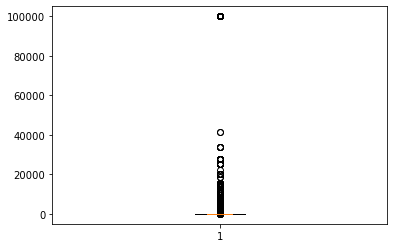

In [46]:
#plot boxplot to find outliers data
plt.boxplot(crypto_income_df2.CAPITAL_GAIN, notch=True)

In [47]:
# fixing outliers 
crypto_income_df2_fix = crypto_income_df2[(crypto_income_df2['CAPITAL_GAIN'] <= 60000) & (crypto_income_df2['CAPITAL_GAIN'] >= 1)]

In [48]:
# new shape of dh after fixing outliers
crypto_income_df2_fix.shape

(2553, 15)

{'whiskers': [<matplotlib.lines.Line2D at 0x1b6113b2670>,
 'caps': [<matplotlib.lines.Line2D at 0x1b6113b2d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b6113b2310>],
 'medians': [<matplotlib.lines.Line2D at 0x1b6113be430>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b6113be790>],
 'means': []}

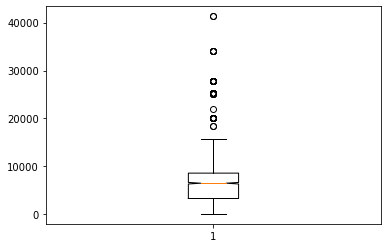

In [49]:
# plot after fixing outliers
#plot boxplot to after fixing outliers data
plt.boxplot(crypto_income_df2_fix.CAPITAL_GAIN, notch=True)